In [ ]:
@jit
def vortex_velocity(z1, z2, gamma):
    return -1j*gamma/(2*np.pi*(z1 - z2))


@jit
def velocity(z, gamma, v):
    n = len(z)
    for i in range(n):
        for j in range(n):
            if i != j:
                v[i] += vortex_velocity(z[i], z[j], gamma[j])


class Vortices:
    def __init__(self, z, gamma):
        self.z = z
        self.gamma = gamma
        self.v = np.zeros_like(z)

    def velocity(self):
        velocity(self.z, self.gamma, self.v)


In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math as M

# %matplotlib notebook

plt.close('all')

def RVM(n,mu,sigma):
    x=np.random.normal(mu, sigma,n)
    y=np.random.normal(mu, sigma,n)
    z=x+1j*y
    Pa=np.zeros_like(z)
    Pa+=z
    plt.figure()
    plt.axis('equal')
    plt.scatter(Pa.real,Pa.imag)
#     plt.show()    
    return Pa,x,y

def heat_kernel(r,kin_visc,dt):
    f = (1/(4*np.pi*kin_visc*dt))*np.exp((-r**2)/(4*kin_visc*dt))
    return f


def exact(mu,sigma,N):
    xe,ye=np.linspace(-1.5,1.5,N),np.linspace(-1.5,1.5,N)
    gridx,gridy=np.meshgrid(xe,ye)
    Z=gridx+1j*gridy
    r=np.abs(Z)
    omega = heat_kernel(r,nu,tf)
    h=xe[1]-xe[0]
    omega=omega*GAMMA*h**2
    plt.figure()
    plt.contourf(gridx,gridy,omega,100,cmap=cm.rainbow)
    plt.colorbar(format='%.0e')
    plt.axis('equal')
    return omega,xe,ye

def gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy):
    gamma_arr[idx-1,idy-1]+=m1x*m1y*gamma
    gamma_arr[idx,idy-1]+=m2x*m1y*gamma
    gamma_arr[idx-1,idy]+=m1x*m2y*gamma
    gamma_arr[idx,idy]+=m2x*m2y*gamma
    
def get_box_data(value,arr):
    m1=0.0
    m2=0.0
    idx=0
    for i in range(len(arr)):
        if value < arr[i]:
#             print('here')
            m1=-arr[i-1]+value
            m2=arr[i]-value
            idx=i
            break
#         print m1,m2,i,value,arr[i]
    return m1,m2,idx

def interp(Pa,xe,ye,gamma_arr,gamma):
    for i in range(len(Pa)):
        m1x,m2x,idx=get_box_data(Pa[i].real,xe)
        m1y,m2y,idy=get_box_data(Pa[i].imag,ye)
        print(xe[idx],xe[idx+1],Pa[i].real,idx,ye[idy-1],ye[idy],Pa[i].imag,idy)
        gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy)
        gridx,gridy=np.meshgrid(xe,ye)
        
    h=xe[1]-xe[0]
    gamma_arr=gamma_arr/h**2
    plt.figure()
    plt.contourf(gridx,gridy,gamma_arr,100,cmap=cm.rainbow)
    plt.colorbar(format='%.0e')
    plt.axis('equal')


GAMMA=1.0
nu=0.1
tf=1.0
n=50
N=4


plt.close('all')

sigma=np.sqrt(2*nu*tf)
gamma=GAMMA/n
mu=0.0

gamma_arr=np.zeros((N,N))
Pa,x,y=RVM(n,mu,sigma)
omega,xe,ye=exact(mu,sigma,N)
interp(Pa,xe,ye,gamma_arr,gamma)
error=np.sqrt((sum(sum(omega-gamma_arr)**2))/N**2)
print(error)

X,Y=np.meshgrid(xe,ye)

fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, omega, rstride=2, cstride=2, linewidth=0, cmap=cm.rainbow)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, gamma_arr, rstride=2, cstride=2, linewidth=0,cmap=cm.rainbow)

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.5, 1.5, 0.024815820063884064, 2, -0.5, 0.5, -0.46087481917397499, 2)


IndexError: index 4 is out of bounds for axis 0 with size 4

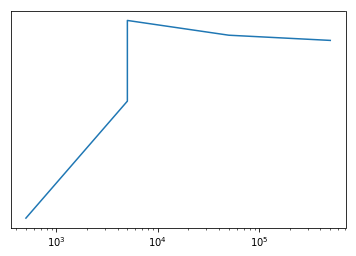

In [17]:
n=[500,5000,5000,50000,500000]
e=[0.0153774516863,0.0153853354567,0.015390776794,0.0153897809362,0.0153894305882]
%matplotlib inline
plt.loglog(n,e)

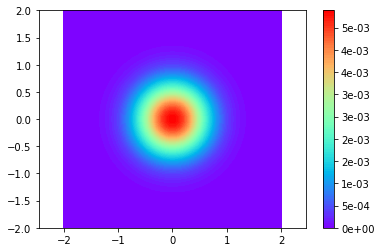

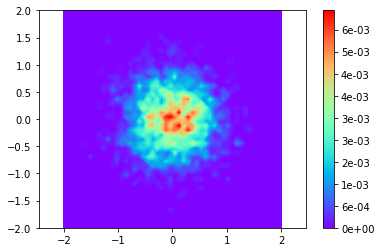

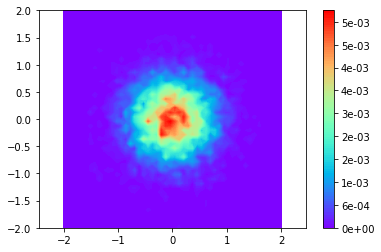

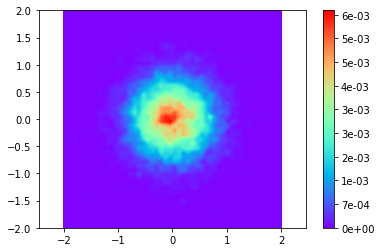

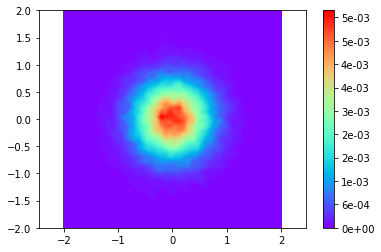

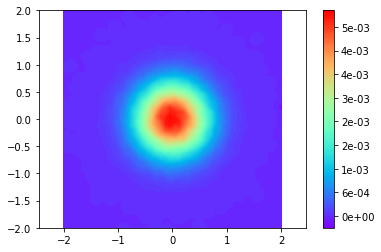

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math as M

plt.close('all')

def RVM(n,mu,sigma):
    x=np.random.normal(mu, sigma,n)
    y=np.random.normal(mu, sigma,n)
    z=x+1j*y
    Pa=np.zeros_like(z)
    Pa+=z
#     plt.figure()
#     plt.axis('equal')
#     plt.scatter(Pa.real,Pa.imag)
#     plt.show()    
    return Pa,x,y

def heat_kernel(r,kin_visc,dt):
    f = (1/(4*np.pi*kin_visc*dt))*np.exp((-r**2)/(4*kin_visc*dt))
    return f


def exact(mu,sigma,N):
    xe,ye=np.linspace(-2,2,N),np.linspace(-2,2,N)
    gridx,gridy=np.meshgrid(xe,ye)
    Z=gridx+1j*gridy
    r=np.abs(Z)
    omega = heat_kernel(r,nu,tf)
    h=xe[1]-xe[0]
    omega=omega*GAMMA*h**2
    plt.figure()
    plt.contourf(gridx,gridy,omega,100,cmap=cm.rainbow)
    plt.colorbar(format='%.0e')
    plt.axis('equal')
    return omega,xe,ye

def gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy):
    gamma_arr[idx-1,idy-1]+=m1x*m1y*gamma
    gamma_arr[idx,idy-1]+=m2x*m1y*gamma
    gamma_arr[idx-1,idy]+=m1x*m2y*gamma
    gamma_arr[idx,idy]+=m2x*m2y*gamma
    
def get_box_data(value,arr):
    m1=0
    m2=0
    idx=0
    for i in range(len(arr)):
        if value < arr[i]:
#             print('here')
            m1=value-arr[i-1]
            m2=arr[i]-value
            idx=i
            break
    return m1,m2,idx

def interp(Pa,xe,ye,gamma_arr,gamma):
    for i in range(len(Pa)):
        m1x,m2x,idx=get_box_data(Pa[i].real,xe)
        m1y,m2y,idy=get_box_data(Pa[i].imag,ye)
        gamma_update(gamma_arr,gamma,m1x,m2x,idx,m1y,m2y,idy)
        gridx,gridy=np.meshgrid(xe,ye)
        
    h=xe[1]-xe[0]
    gamma_arr=gamma_arr/h**2
    plt.figure()
    plt.contourf(gridx,gridy,gamma_arr,100,cmap=cm.rainbow)
    plt.colorbar(format='%.0e')
    plt.axis('equal')


GAMMA=1.0
nu=0.1
tf=1.0
n=100*100
N=50
sigma=np.sqrt(2*nu*tf)
mu=0.0


plt.close('all')
omega,xe,ye=exact(mu,sigma,N)

N_ps=[50*50,80*80,100*100,200*200,500*500]
error=[]
for n in N_ps:
    gamma=GAMMA/n
    gamma_arr=np.zeros((N,N))
    Pa,x,y=RVM(n,mu,sigma)
    interp(Pa,xe,ye,gamma_arr,gamma)
#     error.append((sum(sum(omega-gamma_arr))/N**2))
#     print(error)

# plt.figure()
# plt.loglog(error,N_ps)
plt.show()


In [ ]:
plt